In [7]:
import pandas as pd

In [8]:
bubble = pd.read_csv("raw_bubble_sort.csv")

In [9]:
selection = pd.read_csv("raw_selection_sort.csv")

In [10]:
sizes = bubble.array_size.unique()

In [11]:
for size in sizes:
    print(f"size = {size}")
    print("bubble sort")
    display(bubble.loc[bubble.array_size==size,"elapsed_time"].describe())
    print("selection sort")
    display(selection.loc[selection.array_size==size,"elapsed_time"].describe())

size = 5
bubble sort


count     21.000000
mean      25.190476
std       27.060338
min       12.000000
25%       16.000000
50%       21.000000
75%       22.000000
max      142.000000
Name: elapsed_time, dtype: float64

selection sort


count    21.000000
mean     22.047619
std       2.578298
min      17.000000
25%      20.000000
50%      22.000000
75%      24.000000
max      26.000000
Name: elapsed_time, dtype: float64

size = 10
bubble sort


count     21.000000
mean      75.095238
std       49.153743
min       38.000000
25%       55.000000
50%       60.000000
75%       67.000000
max      258.000000
Name: elapsed_time, dtype: float64

selection sort


count    21.000000
mean     56.095238
std       2.643951
min      49.000000
25%      55.000000
50%      56.000000
75%      57.000000
max      62.000000
Name: elapsed_time, dtype: float64

size = 25
bubble sort


count     21.000000
mean     359.761905
std       96.436458
min      222.000000
25%      296.000000
50%      333.000000
75%      379.000000
max      633.000000
Name: elapsed_time, dtype: float64

selection sort


count     21.000000
mean     279.666667
std       10.081336
min      264.000000
25%      273.000000
50%      281.000000
75%      283.000000
max      310.000000
Name: elapsed_time, dtype: float64

size = 50
bubble sort


count      21.000000
mean     1281.333333
std       696.340961
min       931.000000
25%       982.000000
50%      1051.000000
75%      1321.000000
max      4154.000000
Name: elapsed_time, dtype: float64

selection sort


count      21.000000
mean     1083.952381
std        21.742760
min      1042.000000
25%      1071.000000
50%      1092.000000
75%      1100.000000
max      1128.000000
Name: elapsed_time, dtype: float64

size = 100
bubble sort


count      21.000000
mean     3860.571429
std       351.691565
min      3321.000000
25%      3654.000000
50%      3860.000000
75%      3915.000000
max      4694.000000
Name: elapsed_time, dtype: float64

selection sort


count      21.000000
mean     4243.809524
std        54.093086
min      4098.000000
25%      4226.000000
50%      4252.000000
75%      4277.000000
max      4333.000000
Name: elapsed_time, dtype: float64

size = 200
bubble sort


count       21.000000
mean     15301.238095
std       1407.263654
min      13043.000000
25%      14539.000000
50%      15203.000000
75%      15504.000000
max      18062.000000
Name: elapsed_time, dtype: float64

selection sort


count       21.000000
mean     16784.619048
std        280.885827
min      16363.000000
25%      16670.000000
50%      16733.000000
75%      16847.000000
max      17691.000000
Name: elapsed_time, dtype: float64

In [12]:
import matplotlib.pyplot as plt

def plot_mean_elapsed_time(df, label):
    mean_times = df.groupby('array_size')['elapsed_time'].mean()
    plt.plot(mean_times.index, mean_times.values, marker='o', label=label)
    plt.xlabel('Array Size')
    plt.ylabel('Mean Elapsed Time')
    plt.title('Mean Elapsed Time vs Array Size')
    plt.legend()
    plt.grid(True)

In [13]:
def plot_mean_elapsed_time_by_sortedness(dfs, labels, sortedness=True, size=(20,15), plot_y_as_log=False):

    def plot_sortedness(df, label):
        for sortedness_value in df['sortedness'].unique():
            subset = df[df['sortedness'] == sortedness_value]
            mean_times = subset.groupby('array_size')['elapsed_time'].mean()
            plot_function(mean_times.index, mean_times.values, marker='o', label=f'{label} sortedness={sortedness_value}')

    def plot_mean_elapsed_time(df, label):
        mean_times = df.groupby('array_size')['elapsed_time'].mean()
        plot_function(mean_times.index, mean_times.values, marker='o', label=label)
    
    title = 'Mean Elapsed Time vs Array Size'
    y_label = 'Mean Elapsed Time'
    plot_function = plt.semilogy if plot_y_as_log else plt.plot
    if sortedness: 
        title += " by Sortedness"
    
    if len(dfs) == 1:
        title += f" - {labels[0].capitalize()}"
    
    if plot_y_as_log:
        y_label += " (log)"

    for df, label in zip(dfs, labels):
        if sortedness:
            plot_sortedness(df, label)
        else:
            plot_mean_elapsed_time(df, label)

    plt.title(title)
    plt.xlabel('Array Size')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.gcf().set_size_inches(size)

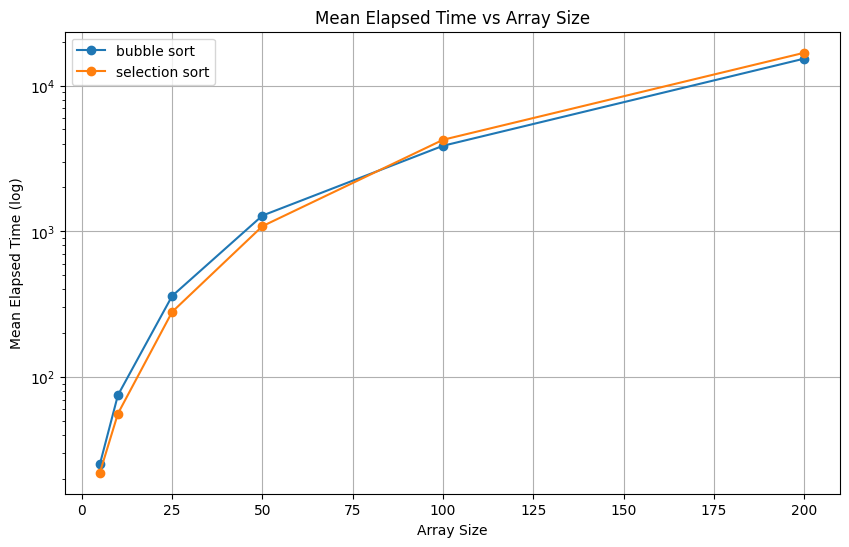

In [14]:
plot_mean_elapsed_time_by_sortedness([bubble, selection], ["bubble sort", "selection sort"], sortedness=False, plot_y_as_log=True, size=(10,6))

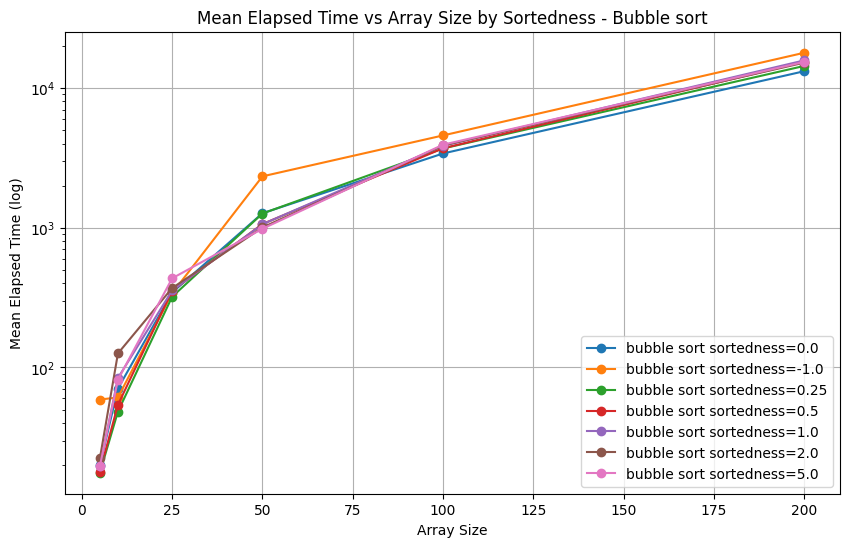

In [15]:
plot_mean_elapsed_time_by_sortedness([bubble], ["bubble sort"], sortedness=True, plot_y_as_log=True, size=(10,6))

In [16]:
bubble

,run,array_size,sortedness,elapsed_time
0,1,5,0.00,21
1,1,5,-1.00,21
2,1,5,0.25,19
3,1,5,0.50,20
4,1,5,1.00,19
...,...,...,...,...
121,3,200,0.25,14156
122,3,200,0.50,16448
123,3,200,1.00,16629
124,3,200,2.00,15051


In [17]:
bubble.loc[bubble.array_size==5,"elapsed_time"].describe()

count     21.000000
mean      25.190476
std       27.060338
min       12.000000
25%       16.000000
50%       21.000000
75%       22.000000
max      142.000000
Name: elapsed_time, dtype: float64